## GMMHMM Speech Recognition

Nathan Singer

In [6]:
import MFCC
import gmmhmm
import gmm
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.io.wavfile
import pickle

$Problem$ $1$

Write a function which accepts a GMMHMM in the format above as well as an integer n sim, and which simulates the GMMHMM process, generating n sim different observations. Do so by implementing the following function declaration.

In [2]:
 def sample_gmmhmm(gmmhmm, n_sim = 30):
    """
    Simulate sampling from a GMMHMM.
    
    Returns
    -------
    states : ndarray of shape (n_sim,)
    The sequence of states
    obs : ndarray of shape (n_sim, K)
    The generated observations (column vectors of length K)
    """
    A = gmmhmm[0]
    weights = gmmhmm[1]
    means = gmmhmm[2]
    covars = gmmhmm[3]
    pi = gmmhmm[4]
    
    samples = []
    states = []
    
    #Do first state here using pi
    state = np.argmax(np.random.multinomial(1, pi)) 
    sample_component = np.argmax(np.random.multinomial(state, weights[1,:]))
    
    samples.append(np.random.multivariate_normal(means[state, sample_component, :], covars[state, sample_component, :, :]))
    states.append(state)
    
    #Iterate through each sample
    for _ in xrange(1, n_sim):
        state = np.argmax(np.random.multinomial(1, A[state]))
        sample_component = np.argmax(np.random.multinomial(state, weights[1,:]))
        
        samples.append(np.random.multivariate_normal(means[state, sample_component, :], covars[state, sample_component, :, :]))
        states.append(state)
        
    return np.array(states), np.array(samples)
    
    return states, obs

A = np.array([[.65, .35], [.15, .85]])
pi = np.array([.8, .2])
weights = np.array([[.7, .2, .1], [.1, .5, .4]])
means1 = np.array([[0., 17., -4.], [5., -12., -8.], [-16., 22., 2.]])
means2 = np.array([[-5., 3., 23.], [-12., -2., 14.], [15., -32., 0.]])
means = np.array([means1, means2])
covars1 = np.array([5*np.eye(3), 7*np.eye(3), np.eye(3)])
covars2 = np.array([10*np.eye(3), 3*np.eye(3), 4*np.eye(3)])
covars = np.array([covars1, covars2])
gmmhmm = [A,weights,means,covars,pi]

sample_gmmhmm(gmmhmm)

(array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 0, 0]),
 array([[  5.30750179,  19.82050748,  -3.60695663],
        [  2.00322773,  17.64181724,  -4.86349831],
        [ -1.02872203,  20.14948984,  -6.4499947 ],
        [ 14.25833238, -34.35404652,  -1.30278812],
        [-11.00810416,  -1.29764062,  17.48424448],
        [-14.91596317,  -3.67673371,  18.03766742],
        [ 13.89690218, -32.81023017,   1.03215793],
        [ 16.96149059, -33.51240129,  -1.62954088],
        [ -1.5479285 ,  15.67259739,  -4.5801316 ],
        [-13.29720993,  -1.34532731,  13.24874083],
        [ 17.0510294 , -31.74439625,  -0.40921311],
        [ -8.36143786,   4.41021274,  20.89299476],
        [ 14.49082789, -33.03551785,  -2.31755267],
        [ 14.97867353, -33.97507156,  -2.79786902],
        [ -9.44098852,  -2.83870891,  12.71748398],
        [ -2.5438008 ,  14.61001039,  -1.8716613 ],
        [  2.48281866,  17.08865886,  -1.18759445],
        

$Problem$ $2$

Create a list of MFCC's for each of the wav files. You should end with 5 lists.

In [3]:
def problem2():
    
    num_wav_files = 155
    num_each = 31

    biology_files = []
    stats_files = []
    polysci_files = []
    psych_files = []
    math_files = []

    def get_files():

        for k in xrange(1,num_each): #exclude first one because it's all of them together
            biology_files.append(scipy.io.wavfile.read('Biology ({}).wav'.format(k)))
            stats_files.append(scipy.io.wavfile.read('Statistics ({}).wav'.format(k)))
            polysci_files.append(scipy.io.wavfile.read('PoliticalScience ({}).wav'.format(k)))
            psych_files.append(scipy.io.wavfile.read('Psychology ({}).wav'.format(k)))
            math_files.append(scipy.io.wavfile.read('Mathematics ({}).wav'.format(k)))

    get_files()

    bio_mfcc = []
    stats_mfcc = []
    polysci_mfcc = []
    psych_mfcc = []
    math_mfcc = []

    def get_mfccs():

        for i in xrange(num_each-1):
            bio_mfcc.append(MFCC.extract(biology_files[i][1]))
            stats_mfcc.append(MFCC.extract(stats_files[i][1]))
            polysci_mfcc.append(MFCC.extract(polysci_files[i][1]))
            psych_mfcc.append(MFCC.extract(psych_files[i][1]))
            math_mfcc.append(MFCC.extract(math_files[i][1]))

        return bio_mfcc, stats_mfcc, polysci_mfcc, psych_mfcc, math_mfcc 

    return get_mfccs()

#problem2()



$Problem$ $3$

Partition each list of MFCCs into a training set of 20 samples, and a test set of the remaining 10 samples.
Using the training sets, train a GMMHMM on each of the words from the previous problem with at least 10 random restarts, keeping the best model for each word (the one with the highest log-likelihood). This process may take several minutes. Since you will not want to run this more than once, you will want to save the best model for each word to disk using the pickle module so that you can use it later.

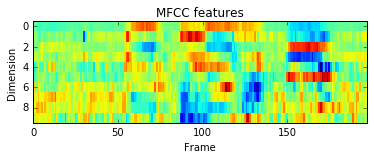

In [26]:
bio20 = problem2()[0][:20]
bio10 = problem2()[0][20:]
stats20 = problem2()[1][:20]
stats10 = problem2()[1][20:]
ps20 = problem2()[2][:20]
ps10 = problem2()[2][20:]
psych20 = problem2()[3][:20]
psych10 = problem2()[3][20:]
math20 = problem2()[4][:20]
math10 = problem2()[4][20:]

I don't know why the above graph came out or what it means, but hey, it sure looks cool.

In [28]:
import gmm

best_models = []

def initialize(N):
    pi = np.random.rand(N)
    pi = pi/np.sum(pi)
    A = np.random.rand(N,N)
    for i in xrange(len(A)):
        A[i] = A[i]/np.sum(A[i])
        
    return pi, A


def problem3():
    
    test_time = 10
    def bio():
        #train for biology
        
        best_log = -np.inf
        best_model = None
        for i in xrange(test_time):
            startprob, transmat = initialize(5)
            model = gmmhmm.GMMHMM(n_components=5, n_mix=3, transmat=transmat, startprob= startprob, cvtype='diag')
            # these values for covars_prior and var should work well for this problem >>> model.covars_prior = 0.01
            model.fit(bio20, init_params='mc', var=0.1)
            if model.logprob > best_log:
                best_log = model.logprob
                best_model = model
        
        best_models.append(best_model)
        
        '''startprob, transmat = initialize(5)
        #print startprob, transmat
        model = gmmhmm.GMMHMM(n_components=5, n_mix=3, transmat=transmat, startprob= startprob, cvtype='diag')
        # these values for covars_prior and var should work well for this problem >>> model.covars_prior = 0.01
        model.fit(bio20, init_params='mc', var=0.1)
        print model.logprob'''
    
    def stats():
        #train for Statistics
        best_log = -np.inf
        best_model = None
        for i in xrange(test_time):
            startprob, transmat = initialize(5)
            model = gmmhmm.GMMHMM(n_components=5, n_mix=3, transmat=transmat, startprob= startprob, cvtype='diag')
            # these values for covars_prior and var should work well for this problem >>> model.covars_prior = 0.01
            model.fit(stats20, init_params='mc', var=0.1)
            if model.logprob > best_log:
                best_log = model.logprob
                best_model = model
        
        best_models.append(best_model)
    
    def ps():
        #train for PoliticalScience
        best_log = -np.inf
        best_model = None
        for i in xrange(test_time):
            startprob, transmat = initialize(5)
            model = gmmhmm.GMMHMM(n_components=5, n_mix=3, transmat=transmat, startprob= startprob, cvtype='diag')
            # these values for covars_prior and var should work well for this problem >>> model.covars_prior = 0.01
            model.fit(ps20, init_params='mc', var=0.1)
            if model.logprob > best_log:
                best_log = model.logprob
                best_model = model
        
        best_models.append(best_model)
    
    def psych():
        #train for Psychology
        best_log = -np.inf
        best_model = None
        for i in xrange(test_time):
            startprob, transmat = initialize(5)
            model = gmmhmm.GMMHMM(n_components=5, n_mix=3, transmat=transmat, startprob= startprob, cvtype='diag')
            # these values for covars_prior and var should work well for this problem >>> model.covars_prior = 0.01
            model.fit(psych20, init_params='mc', var=0.1)
            if model.logprob > best_log:
                best_log = model.logprob
                best_model = model
        
        best_models.append(best_model)

    def maths():
        #train for Mathematics
        best_log = -np.inf
        best_model = None
        for i in xrange(test_time):
            startprob, transmat = initialize(5)
            model = gmmhmm.GMMHMM(n_components=5, n_mix=3, transmat=transmat, startprob= startprob, cvtype='diag')
            # these values for covars_prior and var should work well for this problem >>> model.covars_prior = 0.01
            model.fit(math20, init_params='mc', var=0.1)
            if model.logprob > best_log:
                best_log = model.logprob
                best_model = model
        
        best_models.append(best_model)
    
    bio(), stats(), ps(), psych(), maths() #call the above functions
    
    def print_models():
        for i in xrange(len(best_models)):
            print best_models[i]
    
    print_models()
    
    return best_models #bio() #, stats(), ps(), psych(), maths()
    
    
problem3()

GMMHMM(cvtype='diag',
    gmms=[GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3)],
    n_components=5, n_mix=3,
    startprob=array([  1.11027e-17,   1.11027e-17,   1.11306e-17,   5.36448e-01,
         4.63552e-01]),
    startprob_prior=1.0,
    transmat=array([[  9.65227e-01,   1.96177e-02,   5.08545e-03,   1.00701e-02,
          2.22045e-16],
       [  2.24896e-16,   9.42835e-01,   5.71651e-02,   2.22045e-16,
          2.22045e-16],
       [  2.91681e-02,   4.36556e-02,   8.72171e-01,   5.14423e-02,
          3.56276e-03],
       [  6.09821e-03,   2.36536e-03,   1.91216e-02,   9.32913e-01,
          3.95015e-02],
       [  2.24720e-16,   2.22045e-16,   4.71248e-03,   6.32182e-02,
          9.32069e-01]]),
    transmat_prior=1.0, var=3)
GMMHMM(cvtype='diag',
    gmms=[GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3), GMM(cvtype='diag',

[GMMHMM(cvtype='diag',
     gmms=[GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3)],
     n_components=5, n_mix=3,
     startprob=array([  1.11027e-17,   1.11027e-17,   1.11306e-17,   5.36448e-01,
          4.63552e-01]),
     startprob_prior=1.0,
     transmat=array([[  9.65227e-01,   1.96177e-02,   5.08545e-03,   1.00701e-02,
           2.22045e-16],
        [  2.24896e-16,   9.42835e-01,   5.71651e-02,   2.22045e-16,
           2.22045e-16],
        [  2.91681e-02,   4.36556e-02,   8.72171e-01,   5.14423e-02,
           3.56276e-03],
        [  6.09821e-03,   2.36536e-03,   1.91216e-02,   9.32913e-01,
           3.95015e-02],
        [  2.24720e-16,   2.22045e-16,   4.71248e-03,   6.32182e-02,
           9.32069e-01]]),
     transmat_prior=1.0, var=3), GMMHMM(cvtype='diag',
     gmms=[GMM(cvtype='diag', n_components=3), GMM(cvtype='diag', n_components=3),

In [29]:
models = best_models

$Problem$ $4$

Classify the 10 test samples for each word. How does your system perform? Which words are the hardest to correctly classify? Make a dictionary containing the accuracy of the classification of your five testing sets. Specifically, the words/phrases will be the keys, and the values will be the percent accuracy.

In [30]:
pickle.dump(best_models,open('best_models.p','wb'))

In [121]:
test_models = [bio10,stats10,ps10,psych10,math10]

results = []

for i in test_models:
    for k in i:
        best_score = -np.inf
        best_model = -1
        for j in xrange(len(models)):
            score = models[j].score(k)
            if score > best_score:
                best_score = score
                best_model = j
        results.append(best_model)
    
results = np.array(results)

In [123]:
a,b,c,d,e = 0,0,0,0,0
for i in xrange(len(results)):
    if results[i] == 0 and i < 11:
        a+=1
    if results[i] == 1 and 9 < i < 21:
        b+=1
    if results[i] == 2 and 19 < i < 31:
        c+=1
    if results[i] == 3 and 29 < i < 41:
        d+=1
    if results[i] == 4 and 39 < i < 51:
        e+=1

my_dict = {'Biology':(a/10.)*100, 'Statistics':(b/10.)*100,'PoliticalScience': (c/10.)*100,'Psychology':(d/10.)*100,'Mathematics':(e/10.)*100}

print my_dict
percent = (my_dict['Biology']+my_dict['Statistics']+my_dict['PoliticalScience']+my_dict['Psychology']+my_dict['Mathematics']) /float(len(my_dict))
print "\n There was average accuracy of ",percent,"%"


{'PoliticalScience': 90.0, 'Biology': 70.0, 'Statistics': 100.0, 'Psychology': 100.0, 'Mathematics': 100.0}

 There was average accuracy of  92.0 %


As we can see above, there was a 92% overall accuracy and Biology was the most difficult word to determine with a 70% accuracy